In [1]:
import pymysql
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
timeout = 10
connection = pymysql.connect(
      charset="utf8mb4",
      connect_timeout=timeout,
      cursorclass=pymysql.cursors.DictCursor,
      db="WEATHER-AIR-POLLUTION",
      host="mysql-3cafd5ec-weather-air-pollution.e.aivencloud.com",
      password="**********************",
      read_timeout=timeout,
      port=24379,
      user="avnadmin",
      write_timeout=timeout
)

In [3]:
cur = connection.cursor()
cur.execute("""SELECT * FROM Weather_Air""")
df = pd.DataFrame(cur.fetchall())
df

,date_time,totalprecip_mm,avgvis_km,temp_c,wind_kph,pressure_in,humidity,pm2_5,pm10,o3,no2,so2,co
0,2010-01-01,0.0,6.0,22.3,7.12,29.92,88.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2010-01-02,3.4,4.7,22.2,8.15,29.93,93.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2010-01-03,7.6,3.5,21.2,9.20,29.96,94.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2010-01-04,0.0,9.3,21.9,6.77,29.86,87.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2010-01-05,0.5,10.0,22.8,8.32,29.82,81.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5382,2024-09-26,NaN,NaN,NaN,NaN,NaN,NaN,19.0,11.0,NaN,19.0,46.0,2.0
5383,2024-09-27,NaN,NaN,NaN,NaN,NaN,NaN,16.0,12.0,NaN,19.0,48.0,2.0
5384,2024-09-28,NaN,NaN,NaN,NaN,NaN,NaN,17.0,16.0,NaN,19.0,49.0,2.0
5385,2024-09-29,NaN,NaN,NaN,NaN,NaN,NaN,25.0,17.0,NaN,19.0,50.0,2.0


In [4]:
df['date_time'] = pd.to_datetime(df["date_time"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5387 entries, 0 to 5386
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date_time       5387 non-null   datetime64[ns]
 1   totalprecip_mm  5379 non-null   float64       
 2   avgvis_km       5379 non-null   float64       
 3   temp_c          5379 non-null   float64       
 4   wind_kph        5379 non-null   float64       
 5   pressure_in     5379 non-null   float64       
 6   humidity        5379 non-null   float64       
 7   pm2_5           2006 non-null   float64       
 8   pm10            2008 non-null   float64       
 9   o3              2415 non-null   float64       
 10  no2             2773 non-null   float64       
 11  so2             2189 non-null   float64       
 12  co              1951 non-null   float64       
dtypes: datetime64[ns](1), float64(12)
memory usage: 547.2 KB


In [5]:
start = pd.Timestamp(2014, 1, 1)
end = pd.Timestamp(2024, 9, 23)
df = df[(df["date_time"] >= start) & (df["date_time"] <= end)]
df

,date_time,totalprecip_mm,avgvis_km,temp_c,wind_kph,pressure_in,humidity,pm2_5,pm10,o3,no2,so2,co
1461,2014-01-01,0.00,10.0,15.4,6.38,30.05,68.0,NaN,NaN,NaN,NaN,NaN,NaN
1462,2014-01-02,0.00,10.0,17.7,7.06,29.94,76.0,NaN,44.0,73.0,28.0,92.0,37.0
1463,2014-01-03,2.60,8.2,18.9,8.13,29.97,83.0,125.0,40.0,67.0,17.0,93.0,20.0
1464,2014-01-04,2.80,7.7,18.7,9.03,30.05,83.0,117.0,39.0,37.0,23.0,92.0,12.0
1465,2014-01-05,0.00,10.0,17.9,7.40,29.96,82.0,116.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5375,2024-09-19,82.33,7.8,24.7,23.95,29.58,92.0,10.0,6.0,NaN,19.0,38.0,3.0
5376,2024-09-20,128.75,7.8,25.4,11.84,29.59,93.0,9.0,7.0,NaN,19.0,39.0,3.0
5377,2024-09-21,16.28,9.5,26.7,7.44,29.66,87.0,10.0,5.0,NaN,19.0,39.0,3.0
5378,2024-09-22,213.94,6.5,24.3,12.87,29.64,96.0,7.0,10.0,NaN,19.0,37.0,3.0


In [6]:
# 15/4/2018 null full
df[df["totalprecip_mm"].isnull()]["date_time"]

3026   2018-04-15
Name: date_time, dtype: datetime64[ns]

In [7]:
df.reset_index(inplace=True)
df[['pm2_5', 'pm10', 'o3', 'no2', 'so2', 'co']] = df[['pm2_5', 'pm10', 'o3', 'no2', 'so2', 'co']].replace(0, np.nan)
df["day"] = df["date_time"].dt.day
df["month"] = df["date_time"].dt.month
df["year"] = df["date_time"].dt.year

C:\Users\USER\AppData\Local\Temp\ipykernel_24584\1483491906.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['pm2_5', 'pm10', 'o3', 'no2', 'so2', 'co']] = df[['pm2_5', 'pm10', 'o3', 'no2', 'so2', 'co']].replace(0, np.nan)
C:\Users\USER\AppData\Local\Temp\ipykernel_24584\1483491906.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["day"] = df["date_time"].dt.day
C:\Users\USER\AppData\Local\Temp\ipykernel_24584\1483491906.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sl

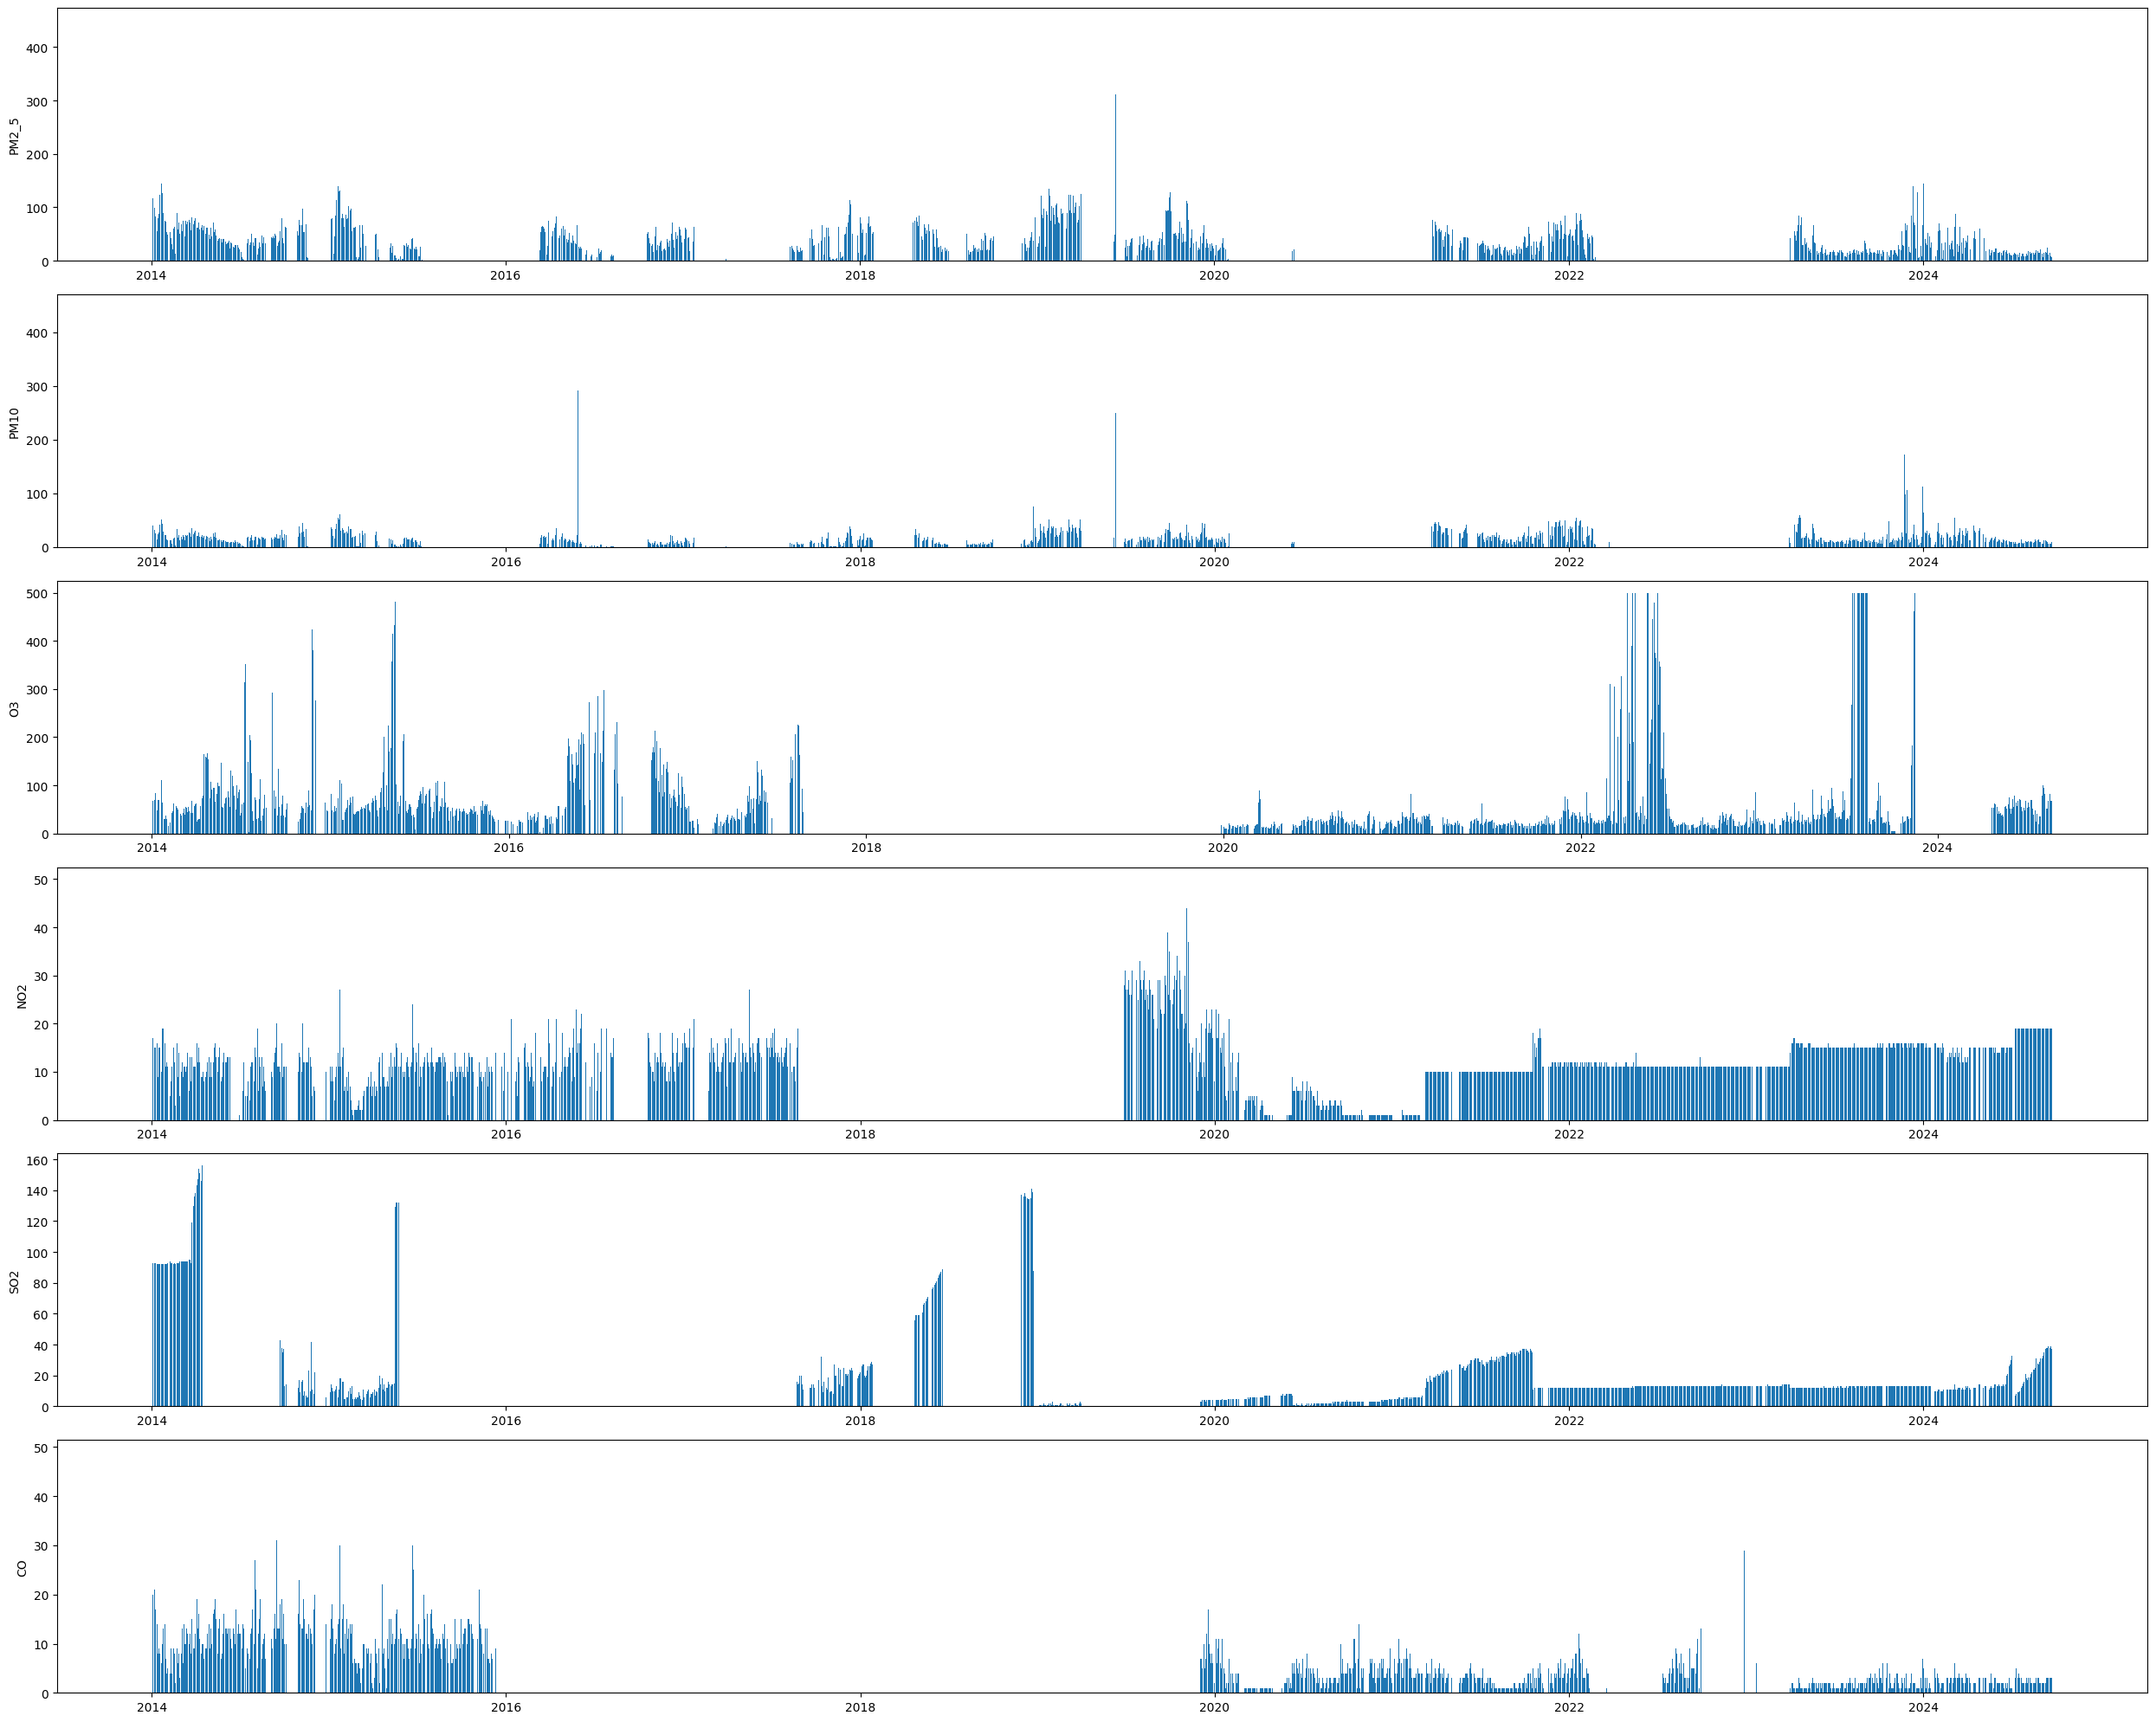

In [8]:
cols = ['pm2_5', 'pm10', 'o3', 'no2', 'so2', 'co']
fig, axs = plt.subplots(nrows=6, ncols=1, figsize=(25, 20))
for i, col in enumerate(cols):
    axs[i].bar(df["date_time"], df[col])
    axs[i].set_ylabel(col.upper())
plt.tight_layout()
plt.show()

In [9]:
# Calculate the percentage difference of two years 2014, 2019 for PM10
data_2014 = df[df['year'] == 2014][['day', 'month', 'pm10']].rename(columns={'pm10': 'pm10_2014'}).copy()
data_2019 = df[df['year'] == 2019][['day', 'month', 'pm10']].rename(columns={'pm10': 'pm10_2019'}).copy()
merged_data = pd.merge(data_2014, data_2019, on=['day', 'month'], how='inner')
merged_data = merged_data[(merged_data['pm10_2014'] < 200) & (merged_data['pm10_2019'] < 200)]
merged_data = merged_data[(merged_data['pm10_2014'] > 0) & (merged_data['pm10_2019'] > 0)]
merged_data['Percentage_change'] = ((merged_data['pm10_2019'] - merged_data['pm10_2014']) / merged_data['pm10_2014'])
average_percentage_change_year_pm10 = merged_data['Percentage_change'].mean()
print("Average percentage difference between 2014 and 2019 PM10:", average_percentage_change_year_pm10)

Average percentage difference between 2014 and 2019 PM10: 0.7416226702930714


In [10]:
# Calculate the percentage difference of two years 2014, 2019 for PM2.5

data_2014 = df[df['year'] == 2014][['day', 'month', 'pm2_5']].rename(columns={'pm2_5': 'pm2_5_2014'})
data_2019 = df[df['year'] == 2019][['day', 'month', 'pm2_5']].rename(columns={'pm2_5': 'pm2_5_2019'})

merged_data = pd.merge(data_2014, data_2019, on=['day', 'month'], how='inner')

merged_data = merged_data[(merged_data['pm2_5_2014'] < 200) & (merged_data['pm2_5_2019'] < 200)]
merged_data = merged_data[(merged_data['pm2_5_2014'] > 0) & (merged_data['pm2_5_2019'] > 0)]

merged_data['Percentage_change'] = ((merged_data['pm2_5_2019'] - merged_data['pm2_5_2014']) / merged_data['pm2_5_2014'])
average_percentage_change_year_pm25 = merged_data['Percentage_change'].mean()
print("Average percentage difference between 2014 and 2019 PM2.5:", average_percentage_change_year_pm25)

Average percentage difference between 2014 and 2019 PM2.5: 0.7137641391946982


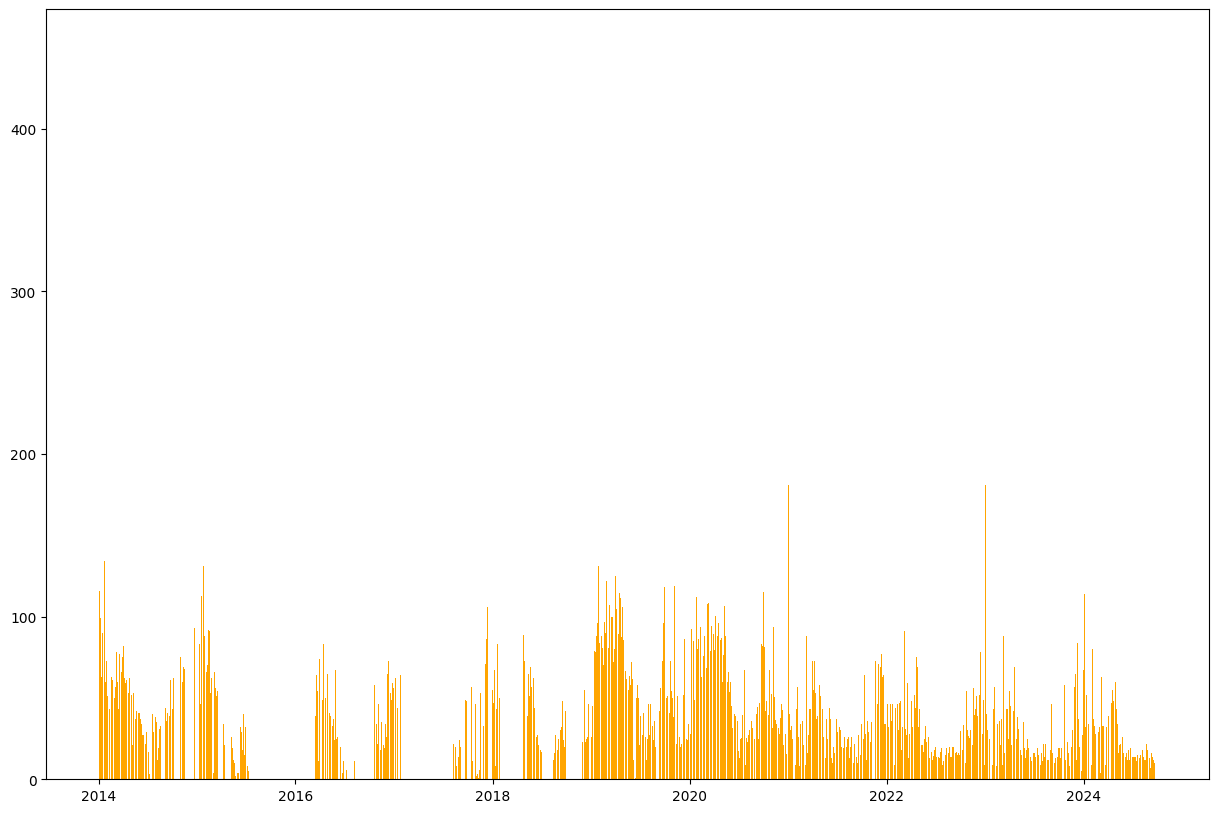

In [11]:
# --------------------------------------------------------------------------------------------------
# fill PM2.5 index
# fill 2022 by finding median same day same month after 2020

pivot_df = df.pivot_table(index=["month", "day"], columns="year", values="pm2_5")
pivot_df.drop(columns=[2014, 2015, 2016, 2017, 2018, 2019], inplace=True)

pivot_df["mean_pm2_5"] = pivot_df.median(axis=1)
df_2022 = df[df["date_time"].dt.year == 2022].copy()
df_2022["mean_pm2_5"] = df_2022.set_index(["month", "day"]).index.map(lambda x: pivot_df.loc[x, "mean_pm2_5"])
start = pd.Timestamp(2022, 1, 1)
end = pd.Timestamp(2023, 1, 1)

df.loc[(df["date_time"] >= start) & (df["date_time"] < end), ["pm2_5"]] = df_2022["mean_pm2_5"]

# --------------------------------------------
# fill 2019 by calculating the rate based on available days of 2014 (PM2.5)
df_2014 = df.loc[df["date_time"].dt.year == 2014, ["date_time", "pm2_5", "month", "day"]].copy()
df_2019 = df.loc[df["date_time"].dt.year == 2019, ["date_time", "pm2_5", "month", "day"]].copy()

for (index1, row1), (index2, row2) in zip(df_2014.iterrows(), df_2019.iterrows()):
    if not pd.isnull(row1["pm2_5"]) and pd.isnull(row2["pm2_5"]):
        df.loc[df["date_time"] == row2["date_time"], ["pm2_5"]] = row1["pm2_5"] * (
                1 + average_percentage_change_year_pm25)

pm25_2019 = df.loc[df["date_time"].dt.year == 2019, ["date_time", "pm2_5"]].copy()
pm25_2019["date_time"] = pm25_2019["date_time"].apply(lambda x: x.replace(year=2020))
pm25_2019["new_pm2_5"] = pm25_2019["pm2_5"] * (1 - 0.126)

for i, row in pm25_2019.iterrows():
    if not pd.isnull(row["pm2_5"]):
        df.loc[df["date_time"] == pd.Timestamp(row["date_time"]), "pm2_5"] = row["new_pm2_5"]

# ------------------------------------------
# fill from 1/2021-7/2021 by 1/2024-7/2024 for missing days and make up for missing 2021 days (PM2.5)
df_2024 = df.loc[(df["date_time"] >= pd.Timestamp(2024, 1, 1)) &
                 (df["date_time"] <= pd.Timestamp(2024, 7, 1)), ["date_time", "pm2_5"]].copy()
df_2021 = df.loc[(df["date_time"] >= pd.Timestamp(2021, 1, 1)) &
                 (df["date_time"] <= pd.Timestamp(2021, 7, 1)), ["date_time", "pm2_5"]].copy()

for (i, row1), (j, row2) in zip(df_2021.iterrows(), df_2024.iterrows()):
    if pd.isnull(row1["pm2_5"]) and not pd.isnull(row2["pm2_5"]):
        df.loc[df["date_time"] == row1["date_time"], "pm2_5"] = row2["pm2_5"]

# ------------------------------------------
# fill from 1/2023-10/4/2023 with 1/1/2024-10/4/2023 for missing days
# because the mean difference of the months is very small, from 1-8 units (PM2.5)
df_2024 = df.loc[(df["date_time"] >= pd.Timestamp(2024, 1, 1)) &
                 (df["date_time"] <= pd.Timestamp(2024, 9, 23)), ["date_time", "pm2_5"]].copy()
df_2023 = df.loc[(df["date_time"] >= pd.Timestamp(2023, 1, 1)) &
                 (df["date_time"] <= pd.Timestamp(2023, 9, 23)), ["date_time", "pm2_5"]].copy()

for (i, row1), (j, row2) in zip(df_2023.iterrows(), df_2024.iterrows()):
    if pd.isnull(row1["pm2_5"]) and not pd.isnull(row2["pm2_5"]):
        df.loc[df["date_time"] == row1["date_time"], "pm2_5"] = row2["pm2_5"]
    if not pd.isnull(row1["pm2_5"]) and pd.isnull(row2["pm2_5"]):
        df.loc[df["date_time"] == row2["date_time"], "pm2_5"] = row1["pm2_5"]
plt.figure(figsize=(15, 10))
plt.bar(df["date_time"], df["pm2_5"], color="orange")
plt.show()

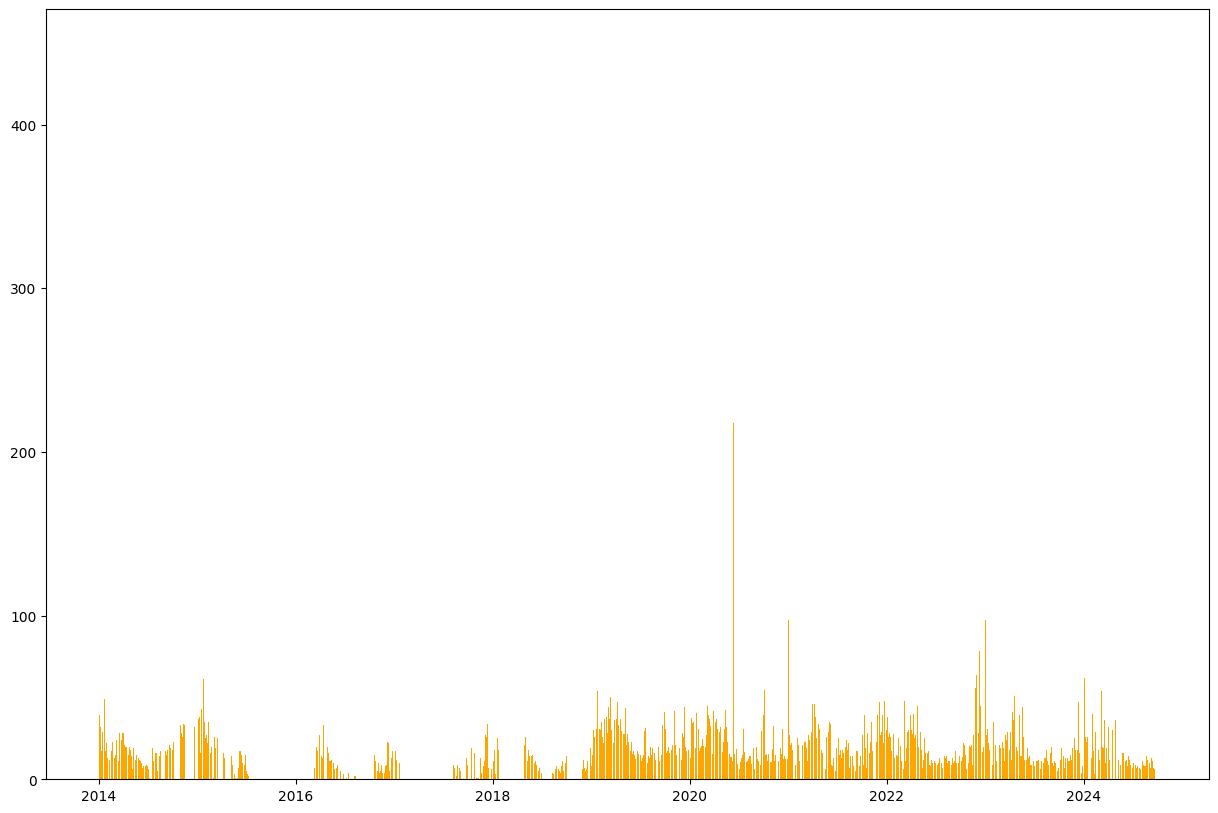

In [12]:
# fill PM10 same as PM2.5
# fill 2022 by finding median same day same month after 2020

pivot_df = df.pivot_table(index=["month", "day"], columns="year", values="pm10")
pivot_df.drop(columns=[2014, 2015, 2016, 2017, 2018, 2019], inplace=True)

pivot_df["mean_pm10"] = pivot_df.median(axis=1)
df_2022 = df[df["date_time"].dt.year == 2022].copy()
df_2022["mean_pm10"] = df_2022.set_index(["month", "day"]).index.map(lambda x: pivot_df.loc[x, "mean_pm10"])
start = pd.Timestamp(2022, 1, 1)
end = pd.Timestamp(2023, 1, 1)

df.loc[(df["date_time"] >= start) & (df["date_time"] < end), ["pm10"]] = df_2022["mean_pm10"]

# -----------------------------------------
# fill 2019 by calculating the rate based on the available date of 2014 (PM10)
df_2014 = df.loc[df["date_time"].dt.year == 2014, ["date_time", "pm10", "month", "day"]].copy()
df_2019 = df.loc[df["date_time"].dt.year == 2019, ["date_time", "pm10", "month", "day"]].copy()

for (index1, row1), (index2, row2) in zip(df_2014.iterrows(), df_2019.iterrows()):
    if not pd.isnull(row1["pm10"]) and pd.isnull(row2["pm10"]):
        df.loc[df["date_time"] == row2["date_time"], ["pm10"]] = row1["pm10"] * (
                1 + average_percentage_change_year_pm10)

pm25_2019 = df.loc[df["date_time"].dt.year == 2019, ["date_time", "pm10"]].copy()
pm25_2019["date_time"] = pm25_2019["date_time"].apply(lambda x: x.replace(year=2020))
pm25_2019["new_pm10"] = pm25_2019["pm10"] * (1 - 0.126)

for i, row in pm25_2019.iterrows():
    if not pd.isnull(row["pm10"]):
        df.loc[df["date_time"] == pd.Timestamp(row["date_time"]), "pm10"] = row["new_pm10"]

# ------------------------------------------

# fill from May 2021 by 5/2024 for missing days (PM10)
df_2024 = df.loc[(df["date_time"] >= pd.Timestamp(2024, 1, 1)) &
                 (df["date_time"] <= pd.Timestamp(2024, 7, 1)), ["date_time", "pm10"]].copy()
df_2021 = df.loc[(df["date_time"] >= pd.Timestamp(2021, 1, 1)) &
                 (df["date_time"] <= pd.Timestamp(2021, 7, 1)), ["date_time", "pm10"]].copy()

for (i, row1), (j, row2) in zip(df_2021.iterrows(), df_2024.iterrows()):
    if pd.isnull(row1["pm10"]) and not pd.isnull(row2["pm10"]):
        df.loc[df["date_time"] == row1["date_time"], "pm10"] = row2["pm10"]

# ------------------------------------------

# fill from 1/2023-10/4/2023 with 1/1/2024-10/4/2023 for missing days
# because the mean difference of the months is very small, from 1-8 units (PM10)
df_2024 = df.loc[(df["date_time"] >= pd.Timestamp(2024, 1, 1)) &
                 (df["date_time"] <= pd.Timestamp(2024, 9, 23)), ["date_time", "pm10"]].copy()
df_2023 = df.loc[(df["date_time"] >= pd.Timestamp(2023, 1, 1)) &
                 (df["date_time"] <= pd.Timestamp(2023, 9, 23)), ["date_time", "pm10"]].copy()

for (i, row1), (j, row2) in zip(df_2023.iterrows(), df_2024.iterrows()):
    if pd.isnull(row1["pm10"]) and not pd.isnull(row2["pm10"]):
        df.loc[df["date_time"] == row1["date_time"], "pm10"] = row2["pm10"]
plt.figure(figsize=(15, 10))
plt.bar(df["date_time"], df["pm10"], color="orange")
plt.show()

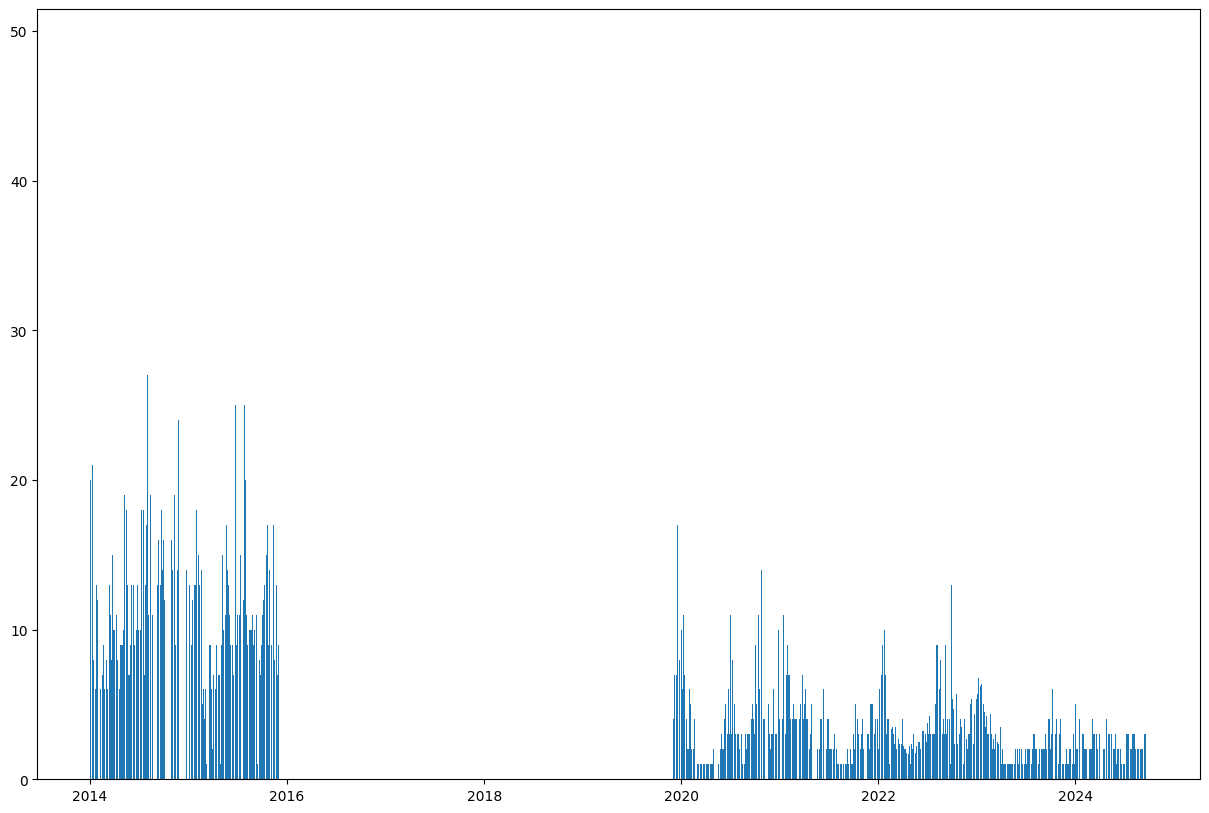

In [13]:
# fill CO with mean same day same month after 2020 because before the epidemic the indexes are different after the epidemic

pivot_df = df.pivot_table(index=["day", "month"], columns=["year"], values="co")
pivot_df.drop(columns=[2014, 2015, 2019], inplace=True)
pivot_df["median_co"] = pivot_df.mean(axis=1)

start = pd.Timestamp(2022, 1, 1)
end = pd.Timestamp(2023, 4, 1)

df_22_23 = df.loc[(df["date_time"] >= start) & (df["date_time"] < end), ["date_time", "co", "month", "day"]]
df_22_23 = pd.merge(df_22_23, pivot_df["median_co"], on=["month", "day"], how="inner")
for i, row in df_22_23.iterrows():
    if pd.isnull(row["co"]):
        df.loc[df["date_time"] == row["date_time"], ["co"]] = row["median_co"]
plt.figure(figsize=(15, 10))
plt.bar(df["date_time"], df["co"])
plt.show()

In [14]:
# Calculate the percentage difference of two years 2014, 2019 for O3
start1 = pd.Timestamp(2020, 4, 21)
end1 = pd.Timestamp(2020, 8, 22)
start2 = pd.Timestamp(2024, 4, 21)
end2 = pd.Timestamp(2024, 8, 22)
data_2020 = df.loc[(df["date_time"] >= start1) & (df["date_time"] <= end1), ["day", "month", "o3"]].copy().rename(columns={"o3": "o3_2020"})
data_2024 = df.loc[(df["date_time"] >= start2) & (df["date_time"] <= end2), ["day", "month", "o3"]].copy().rename(columns={"o3": "o3_2024"})
merged_data = pd.merge(data_2020, data_2024, on=['day', 'month'], how='inner')
merged_data['Percentage_change'] = ((merged_data['o3_2024'] - merged_data['o3_2020']) / merged_data['o3_2020'])
average_percentage_change_year_o3 = merged_data['Percentage_change'].mean()
print("Average percentage difference between 2014 and 2019 O3:", average_percentage_change_year_o3)

Average percentage difference between 2014 and 2019 O3: 2.0018879720151324


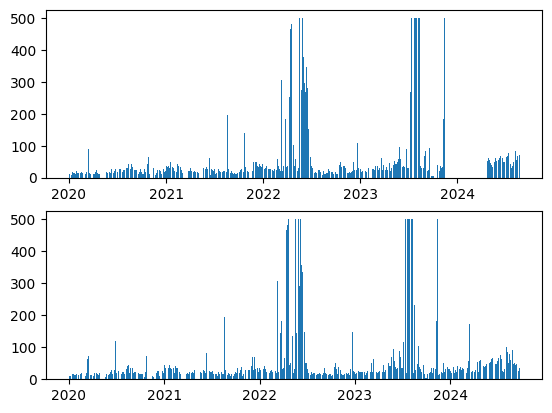

In [15]:
df = df.loc[df["date_time"].dt.year >= 2020]
pivot_df = df.pivot_table(index=["month", "day"], columns="year", values="o3")
pivot_df["median_o3"] = pivot_df.median(axis=1)
corr = pivot_df.corr() # correlation of mean is quite high with 2023
fig, ax = plt.subplots(nrows=2, ncols=1)

ax[0].bar(df["date_time"], df["o3"])

df_2020 = df.loc[df["date_time"] <= pd.Timestamp(2020, 9, 23)].copy()
df_2024 = df.loc[df["date_time"].dt.year == 2024].copy()
for (i, row1), (j, row2) in zip(df_2020.iterrows(), df_2024.iterrows()):
    if pd.isnull(row2["o3"]) and not pd.isnull(row1["o3"]):
        df.loc[df["date_time"] == row2["date_time"], "o3"] = row1["o3"] * average_percentage_change_year_o3
df_2023 = df.loc[df["date_time"].dt.year == 2023].copy()

for (i, row1), (j, row2) in zip(df_2023.iterrows(), pivot_df.iterrows()):
    if pd.isnull(row1["o3"]) and not pd.isnull(row2["median_o3"]):
        df.loc[df["date_time"] == row1["date_time"], "o3"] = row2["median_o3"]
ax[1].bar(df["date_time"], df["o3"])
plt.show()

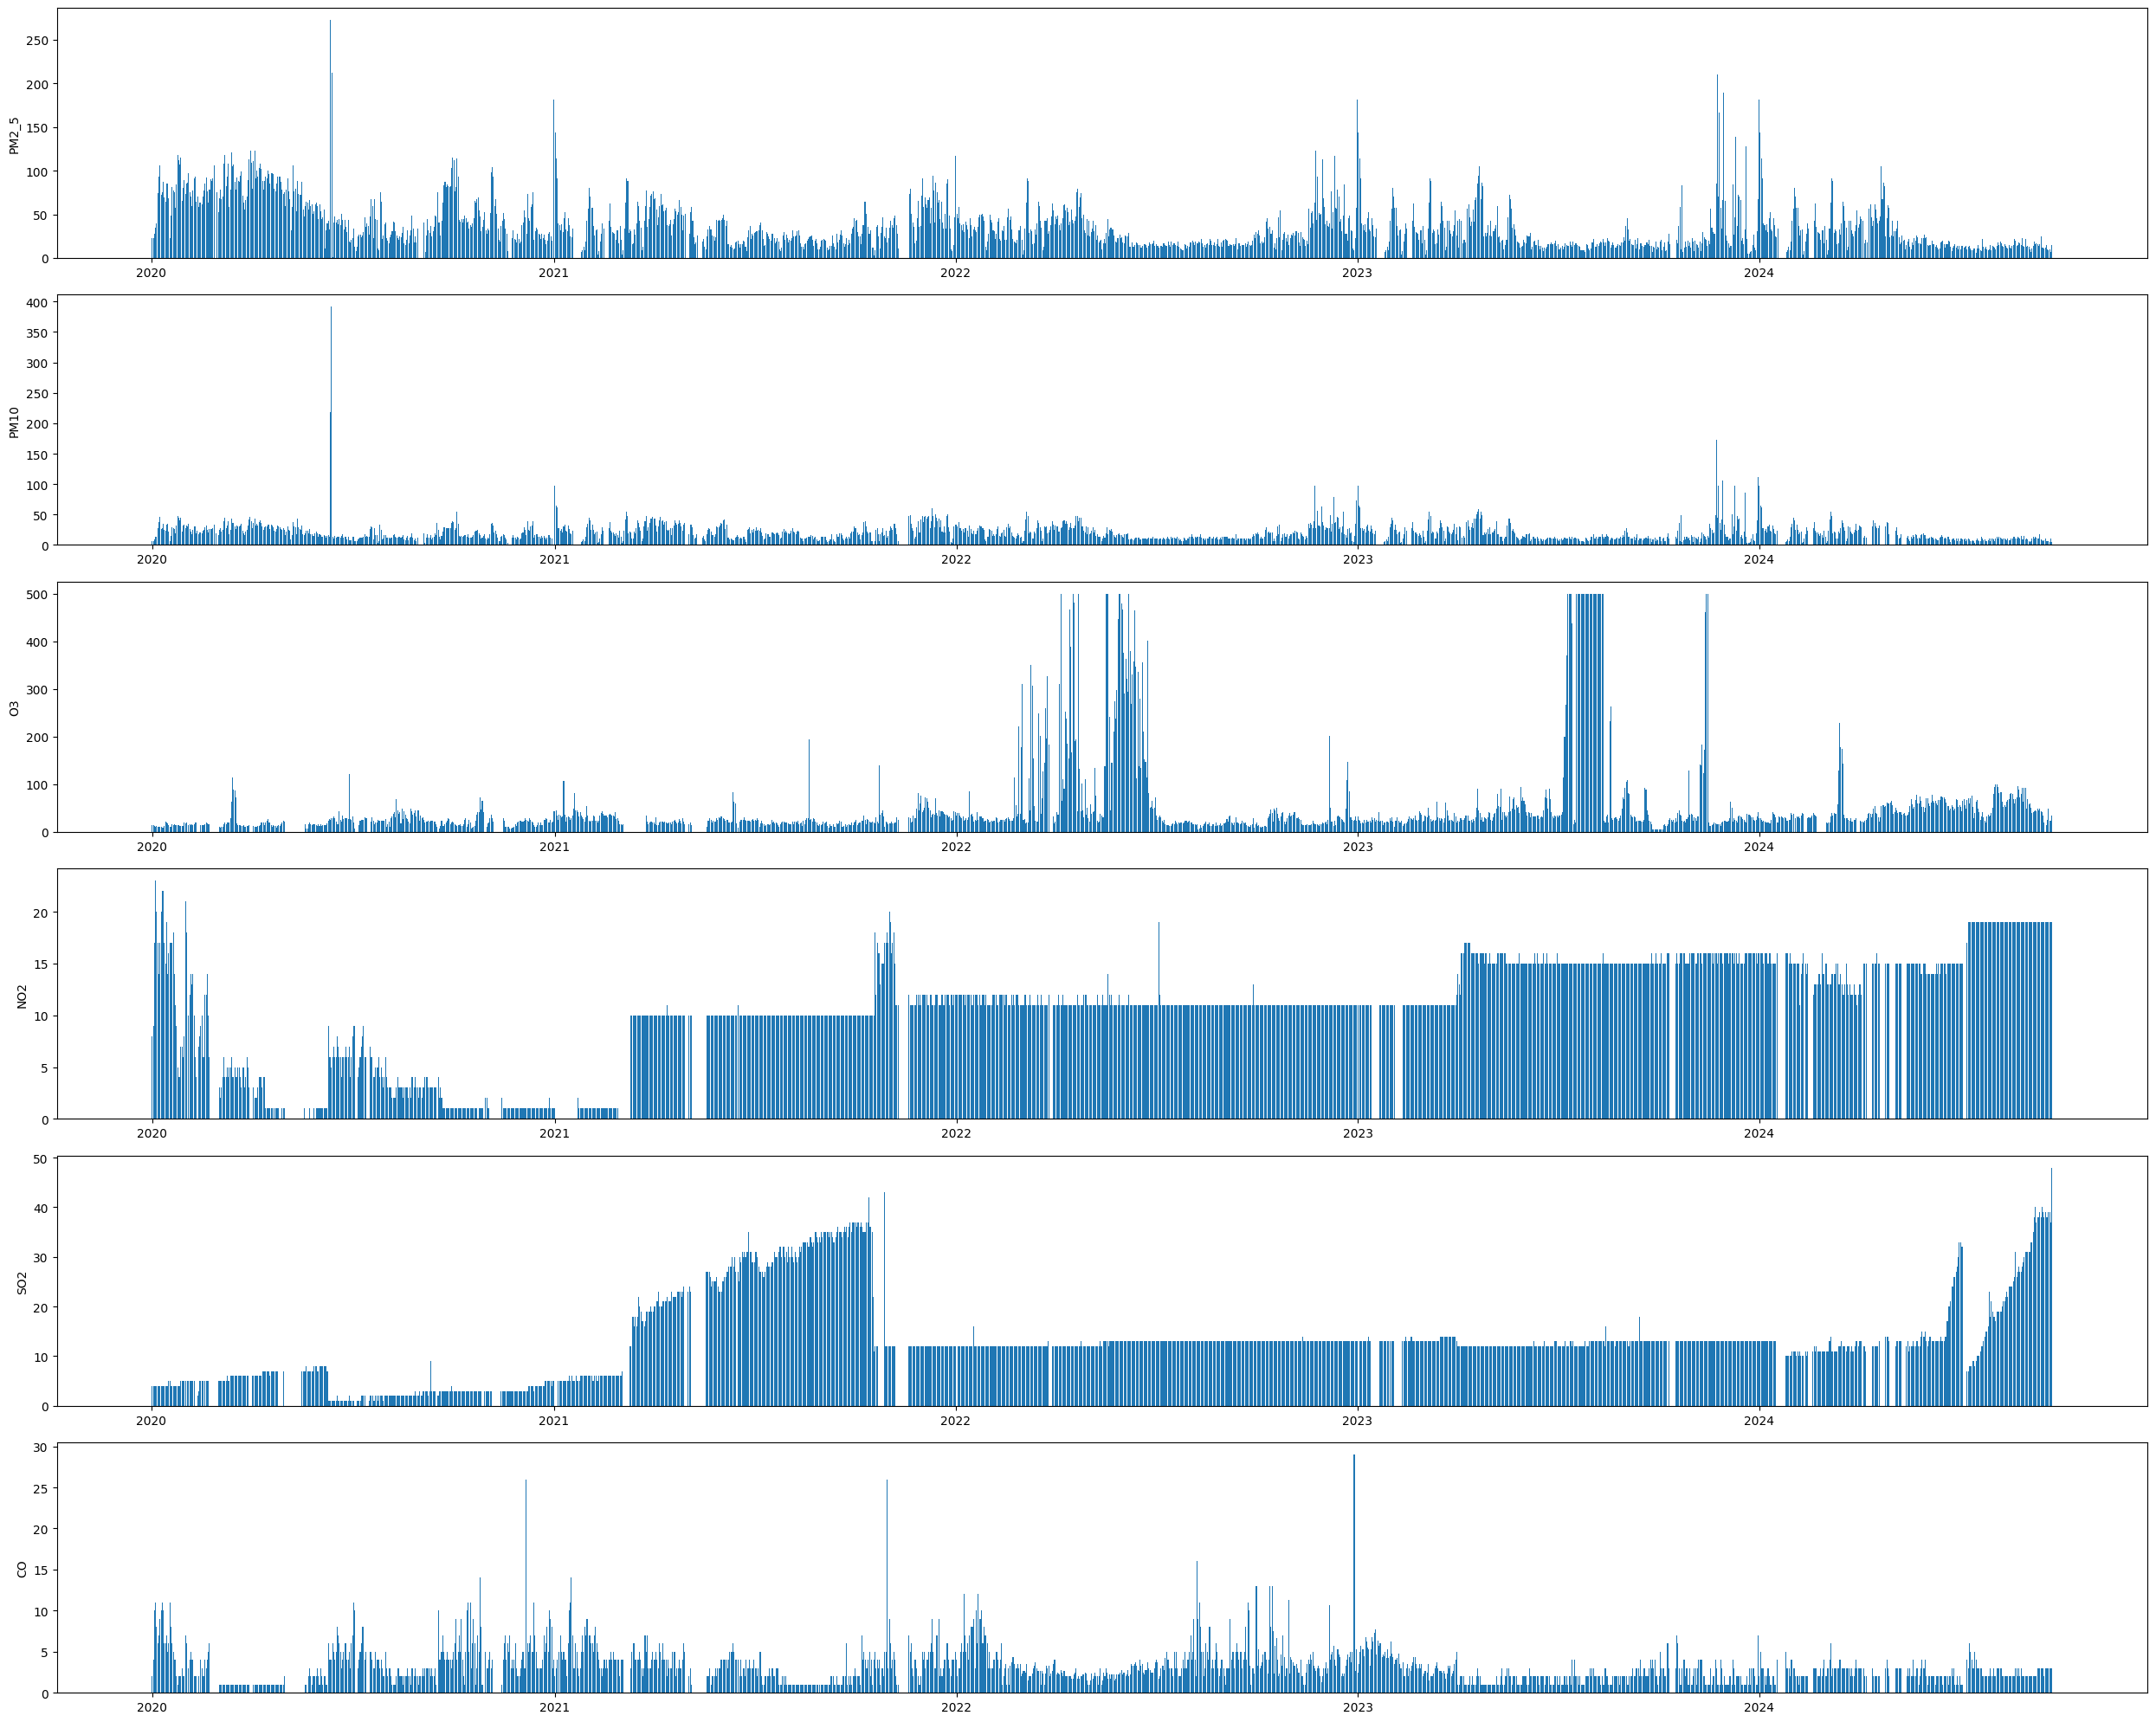

In [16]:
cols = ['pm2_5', 'pm10', 'o3', 'no2', 'so2', 'co']
fig, axs = plt.subplots(nrows=6, ncols=1, figsize=(25, 20))
for i, col in enumerate(cols):
    axs[i].bar(df["date_time"], df[col])
    axs[i].set_ylabel(col.upper())
plt.tight_layout()
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_24584\2736190920.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['totalprecip_mm', 'avgvis_km', 'temp_c', 'wind_kph', 'pressure_in', 'humidity', 'pm2_5', 'pm10']] = (
C:\Users\USER\AppData\Local\Temp\ipykernel_24584\2736190920.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['no2', 'so2', 'co', "o3"]] = df[['no2', 'so2', 'co', "o3"]].interpolate(method="nearest")


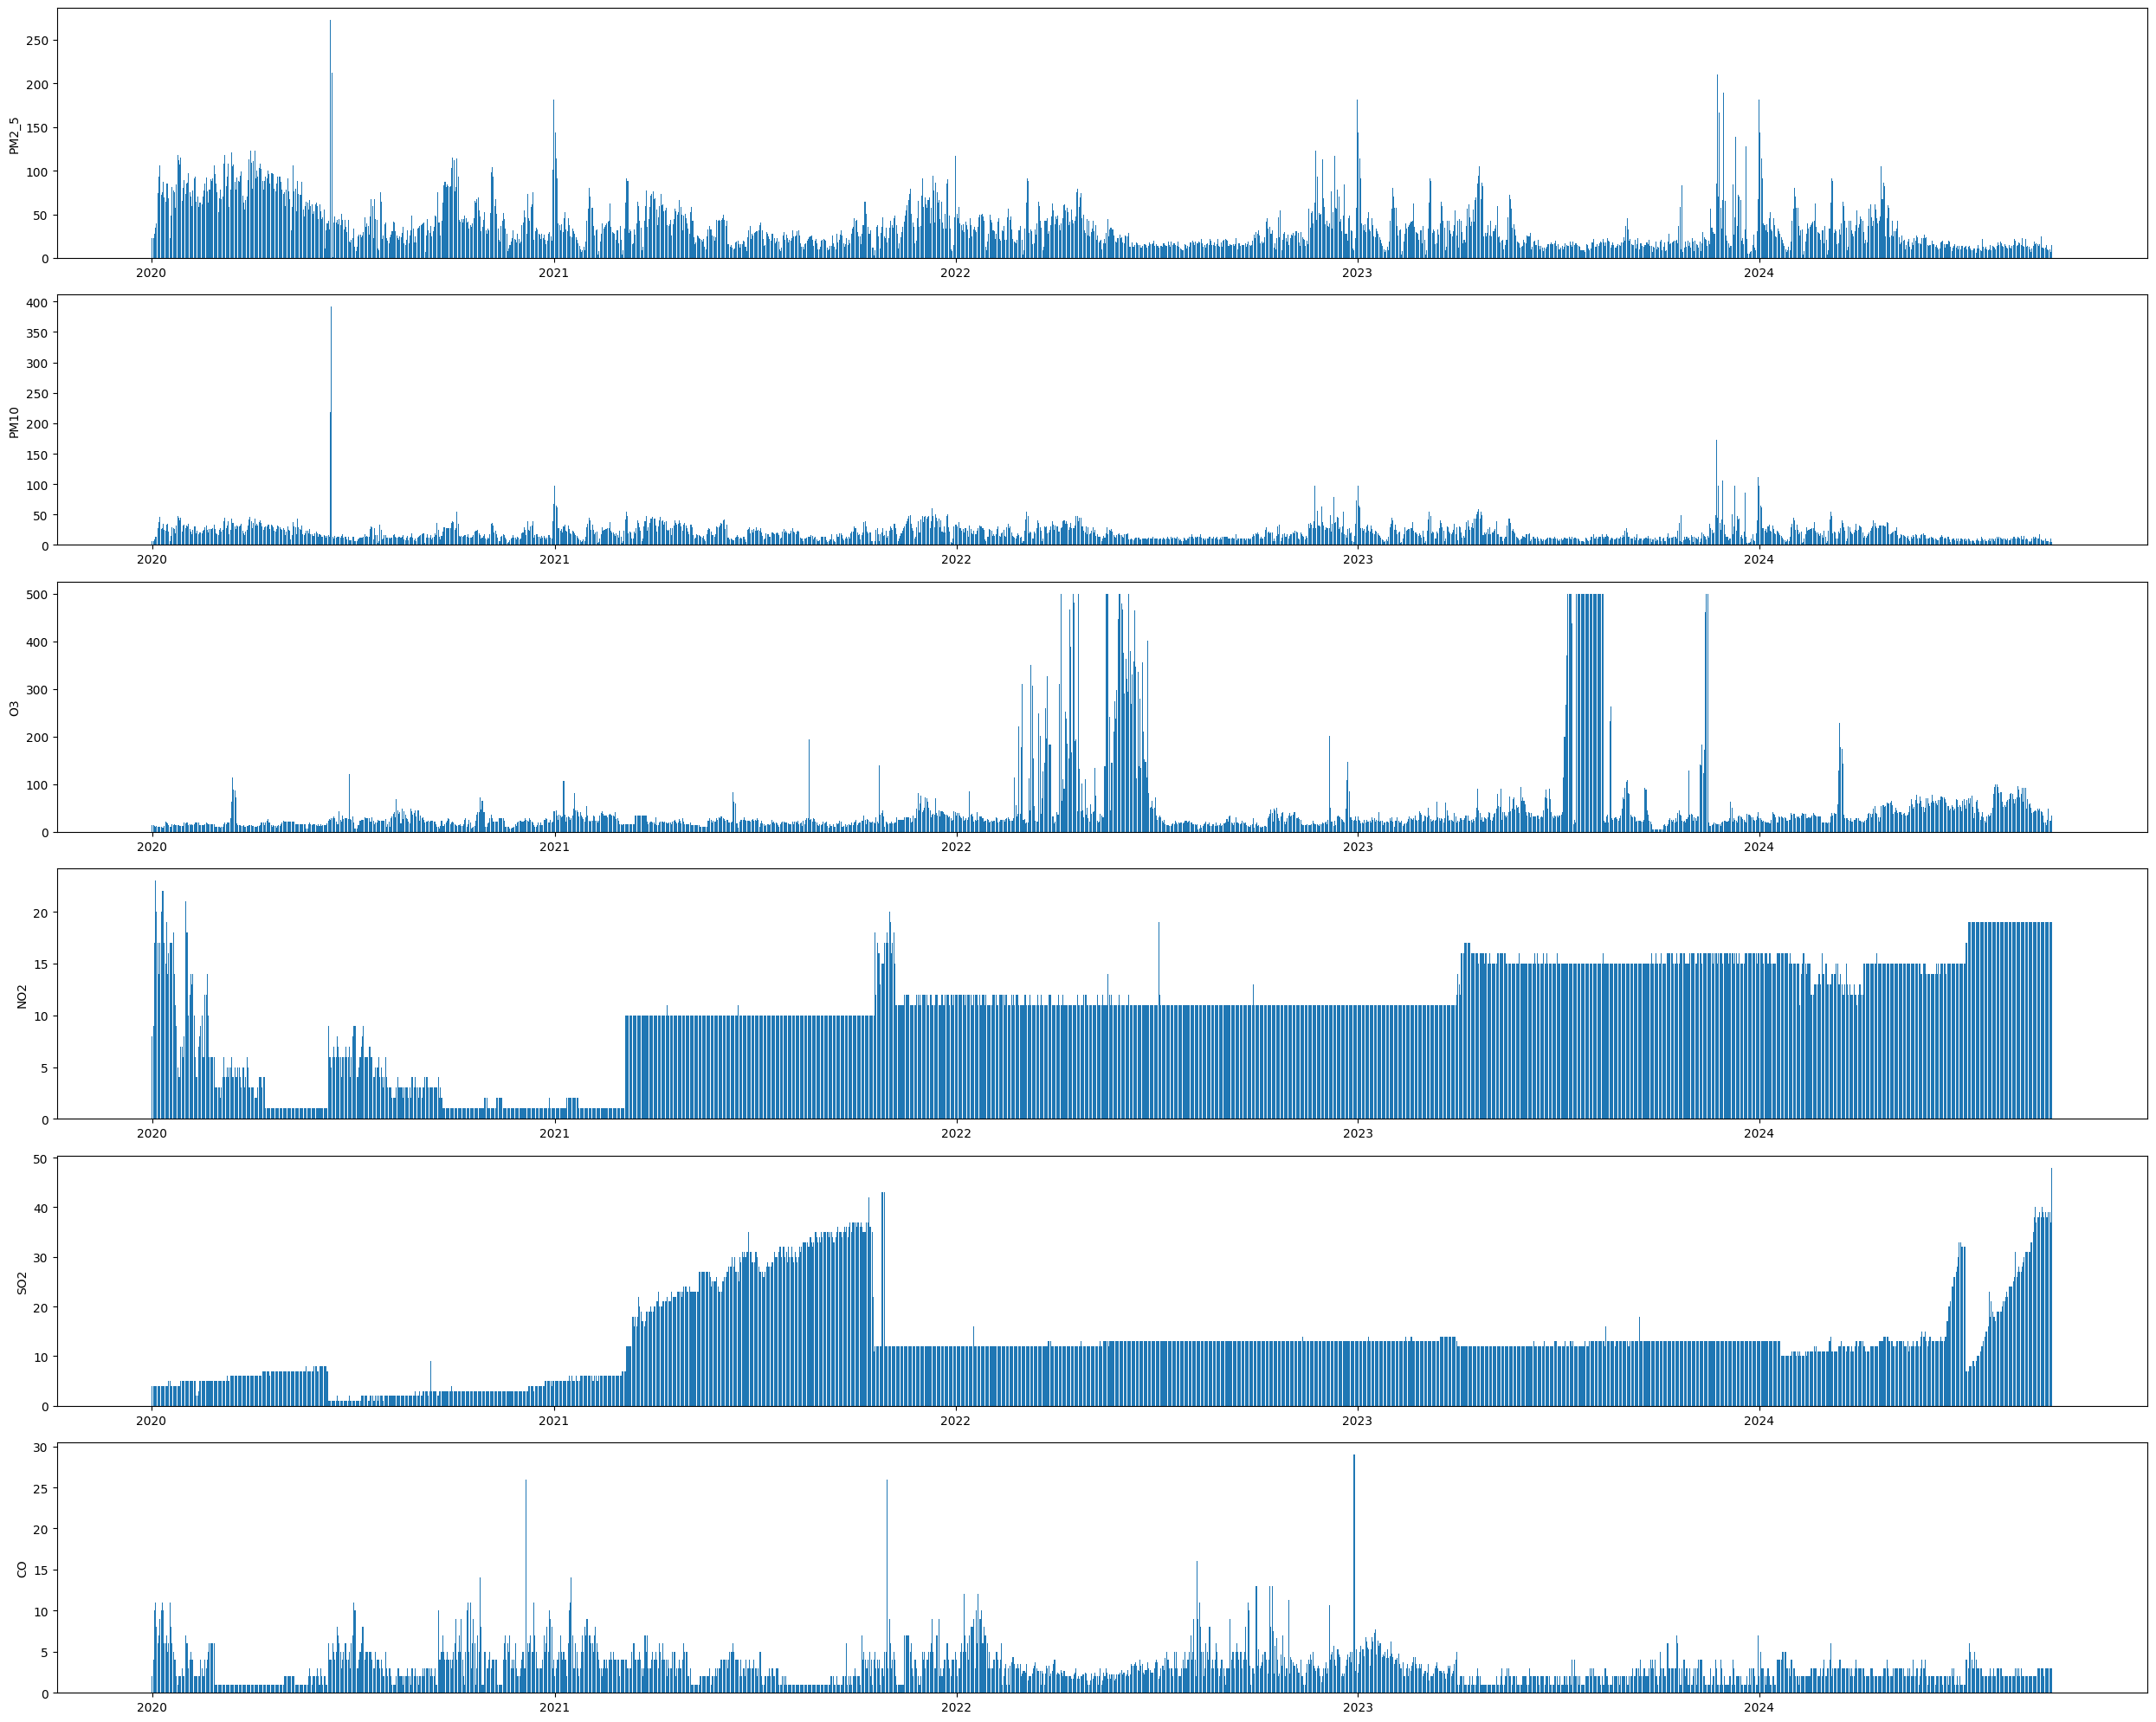

In [17]:
df[['totalprecip_mm', 'avgvis_km', 'temp_c', 'wind_kph', 'pressure_in', 'humidity', 'pm2_5', 'pm10']] = (
    df[['totalprecip_mm', 'avgvis_km', 'temp_c', 'wind_kph', 'pressure_in', 'humidity', 'pm2_5', 'pm10']].interpolate(method="linear"))

df[['no2', 'so2', 'co', "o3"]] = df[['no2', 'so2', 'co', "o3"]].interpolate(method="nearest")

cols = ['pm2_5', 'pm10', 'o3', 'no2', 'so2', 'co']
fig, axs = plt.subplots(nrows=6, ncols=1, figsize=(25, 20))
for i, col in enumerate(cols):
    axs[i].bar(df["date_time"], df[col])
    axs[i].set_ylabel(col.upper())
plt.tight_layout()
plt.show()

In [18]:
df.isnull().sum()

index             0
date_time         0
totalprecip_mm    0
avgvis_km         0
temp_c            0
wind_kph          0
pressure_in       0
humidity          0
pm2_5             1
pm10              0
o3                0
no2               0
so2               1
co                0
day               0
month             0
year              0
dtype: int64

In [19]:
df.head(5)

,index,date_time,totalprecip_mm,avgvis_km,temp_c,wind_kph,pressure_in,humidity,pm2_5,pm10,o3,no2,so2,co,day,month,year
2191,3652,2020-01-01,15.0,6.5,19.0,11.89,30.15,96.0,NaN,6.118,14.0,8.0,NaN,2.0,1,1,2020
2192,3653,2020-01-02,1.7,4.9,20.9,6.63,30.13,93.0,22.724,6.992,14.0,9.0,4.0,4.0,2,1,2020
2193,3654,2020-01-03,2.1,8.8,21.9,7.33,30.07,91.0,22.724,9.614,13.0,17.0,4.0,10.0,3,1,2020
2194,3655,2020-01-04,0.7,9.7,22.2,6.32,30.02,85.0,27.968,13.110,11.0,23.0,4.0,11.0,4,1,2020
2195,3656,2020-01-05,0.2,10.0,21.5,6.72,30.00,86.0,34.960,13.110,12.0,20.0,4.0,8.0,5,1,2020


In [20]:
df.drop(columns=["index"], inplace=True)
df.reset_index(drop=True, inplace=True)
df.head(5)

C:\Users\USER\AppData\Local\Temp\ipykernel_24584\3457730568.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=["index"], inplace=True)


,date_time,totalprecip_mm,avgvis_km,temp_c,wind_kph,pressure_in,humidity,pm2_5,pm10,o3,no2,so2,co,day,month,year
0,2020-01-01,15.0,6.5,19.0,11.89,30.15,96.0,NaN,6.118,14.0,8.0,NaN,2.0,1,1,2020
1,2020-01-02,1.7,4.9,20.9,6.63,30.13,93.0,22.724,6.992,14.0,9.0,4.0,4.0,2,1,2020
2,2020-01-03,2.1,8.8,21.9,7.33,30.07,91.0,22.724,9.614,13.0,17.0,4.0,10.0,3,1,2020
3,2020-01-04,0.7,9.7,22.2,6.32,30.02,85.0,27.968,13.110,11.0,23.0,4.0,11.0,4,1,2020
4,2020-01-05,0.2,10.0,21.5,6.72,30.00,86.0,34.960,13.110,12.0,20.0,4.0,8.0,5,1,2020


In [21]:
df.loc[0, "pm2_5"] = df.loc[1, "pm2_5"]
df.loc[0, "so2"] = df.loc[1, "so2"]
df.head(5)

,date_time,totalprecip_mm,avgvis_km,temp_c,wind_kph,pressure_in,humidity,pm2_5,pm10,o3,no2,so2,co,day,month,year
0,2020-01-01,15.0,6.5,19.0,11.89,30.15,96.0,22.724,6.118,14.0,8.0,4.0,2.0,1,1,2020
1,2020-01-02,1.7,4.9,20.9,6.63,30.13,93.0,22.724,6.992,14.0,9.0,4.0,4.0,2,1,2020
2,2020-01-03,2.1,8.8,21.9,7.33,30.07,91.0,22.724,9.614,13.0,17.0,4.0,10.0,3,1,2020
3,2020-01-04,0.7,9.7,22.2,6.32,30.02,85.0,27.968,13.110,11.0,23.0,4.0,11.0,4,1,2020
4,2020-01-05,0.2,10.0,21.5,6.72,30.00,86.0,34.960,13.110,12.0,20.0,4.0,8.0,5,1,2020


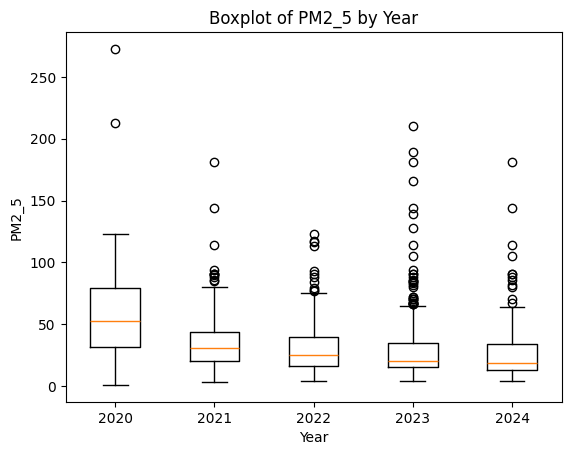

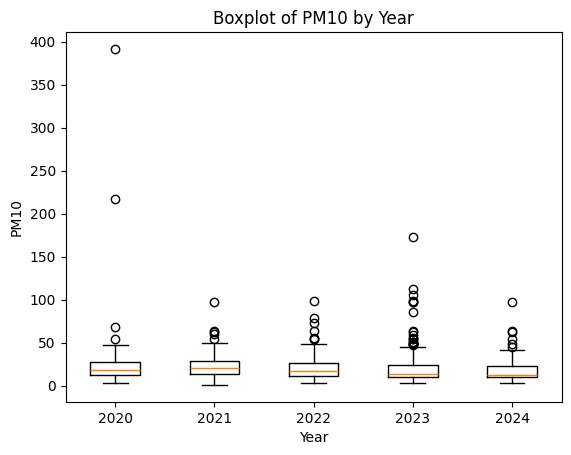

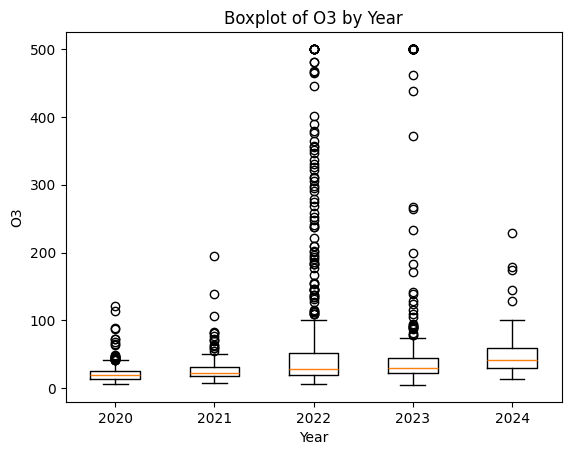

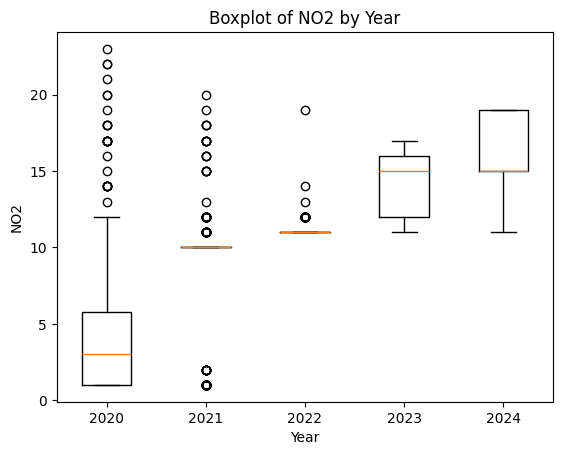

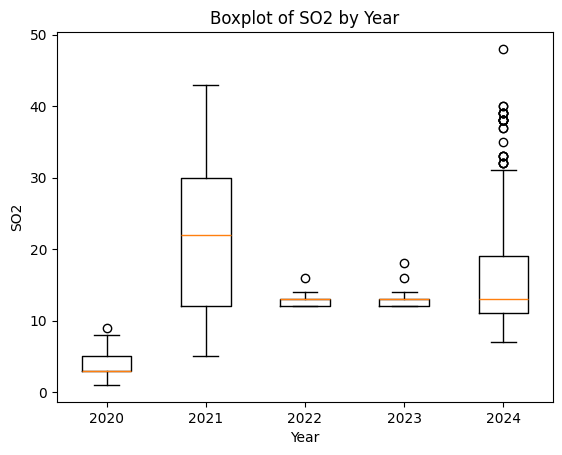

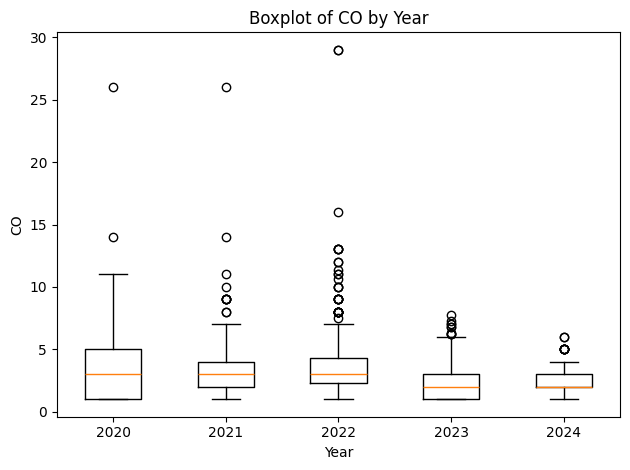

In [22]:
groups = df.groupby(["year"])
years = range(2020, 2025)
outliers = {col: [] for col in cols}
for i, col in enumerate(cols):
    val = []
    fig, ax = plt.subplots(nrows=1, ncols=1)
    for year in years:
        data = groups.get_group((year,))
        data_col = data[col].dropna()
        val.append(data_col)

        Q1 = data_col.quantile(0.25)
        Q3 = data_col.quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

    ax.boxplot(val, labels=years)
    ax.set_title(f'Boxplot of {col.upper()} by Year')
    ax.set_ylabel(col.upper())
    ax.set_xlabel("Year")
plt.tight_layout()
plt.show()

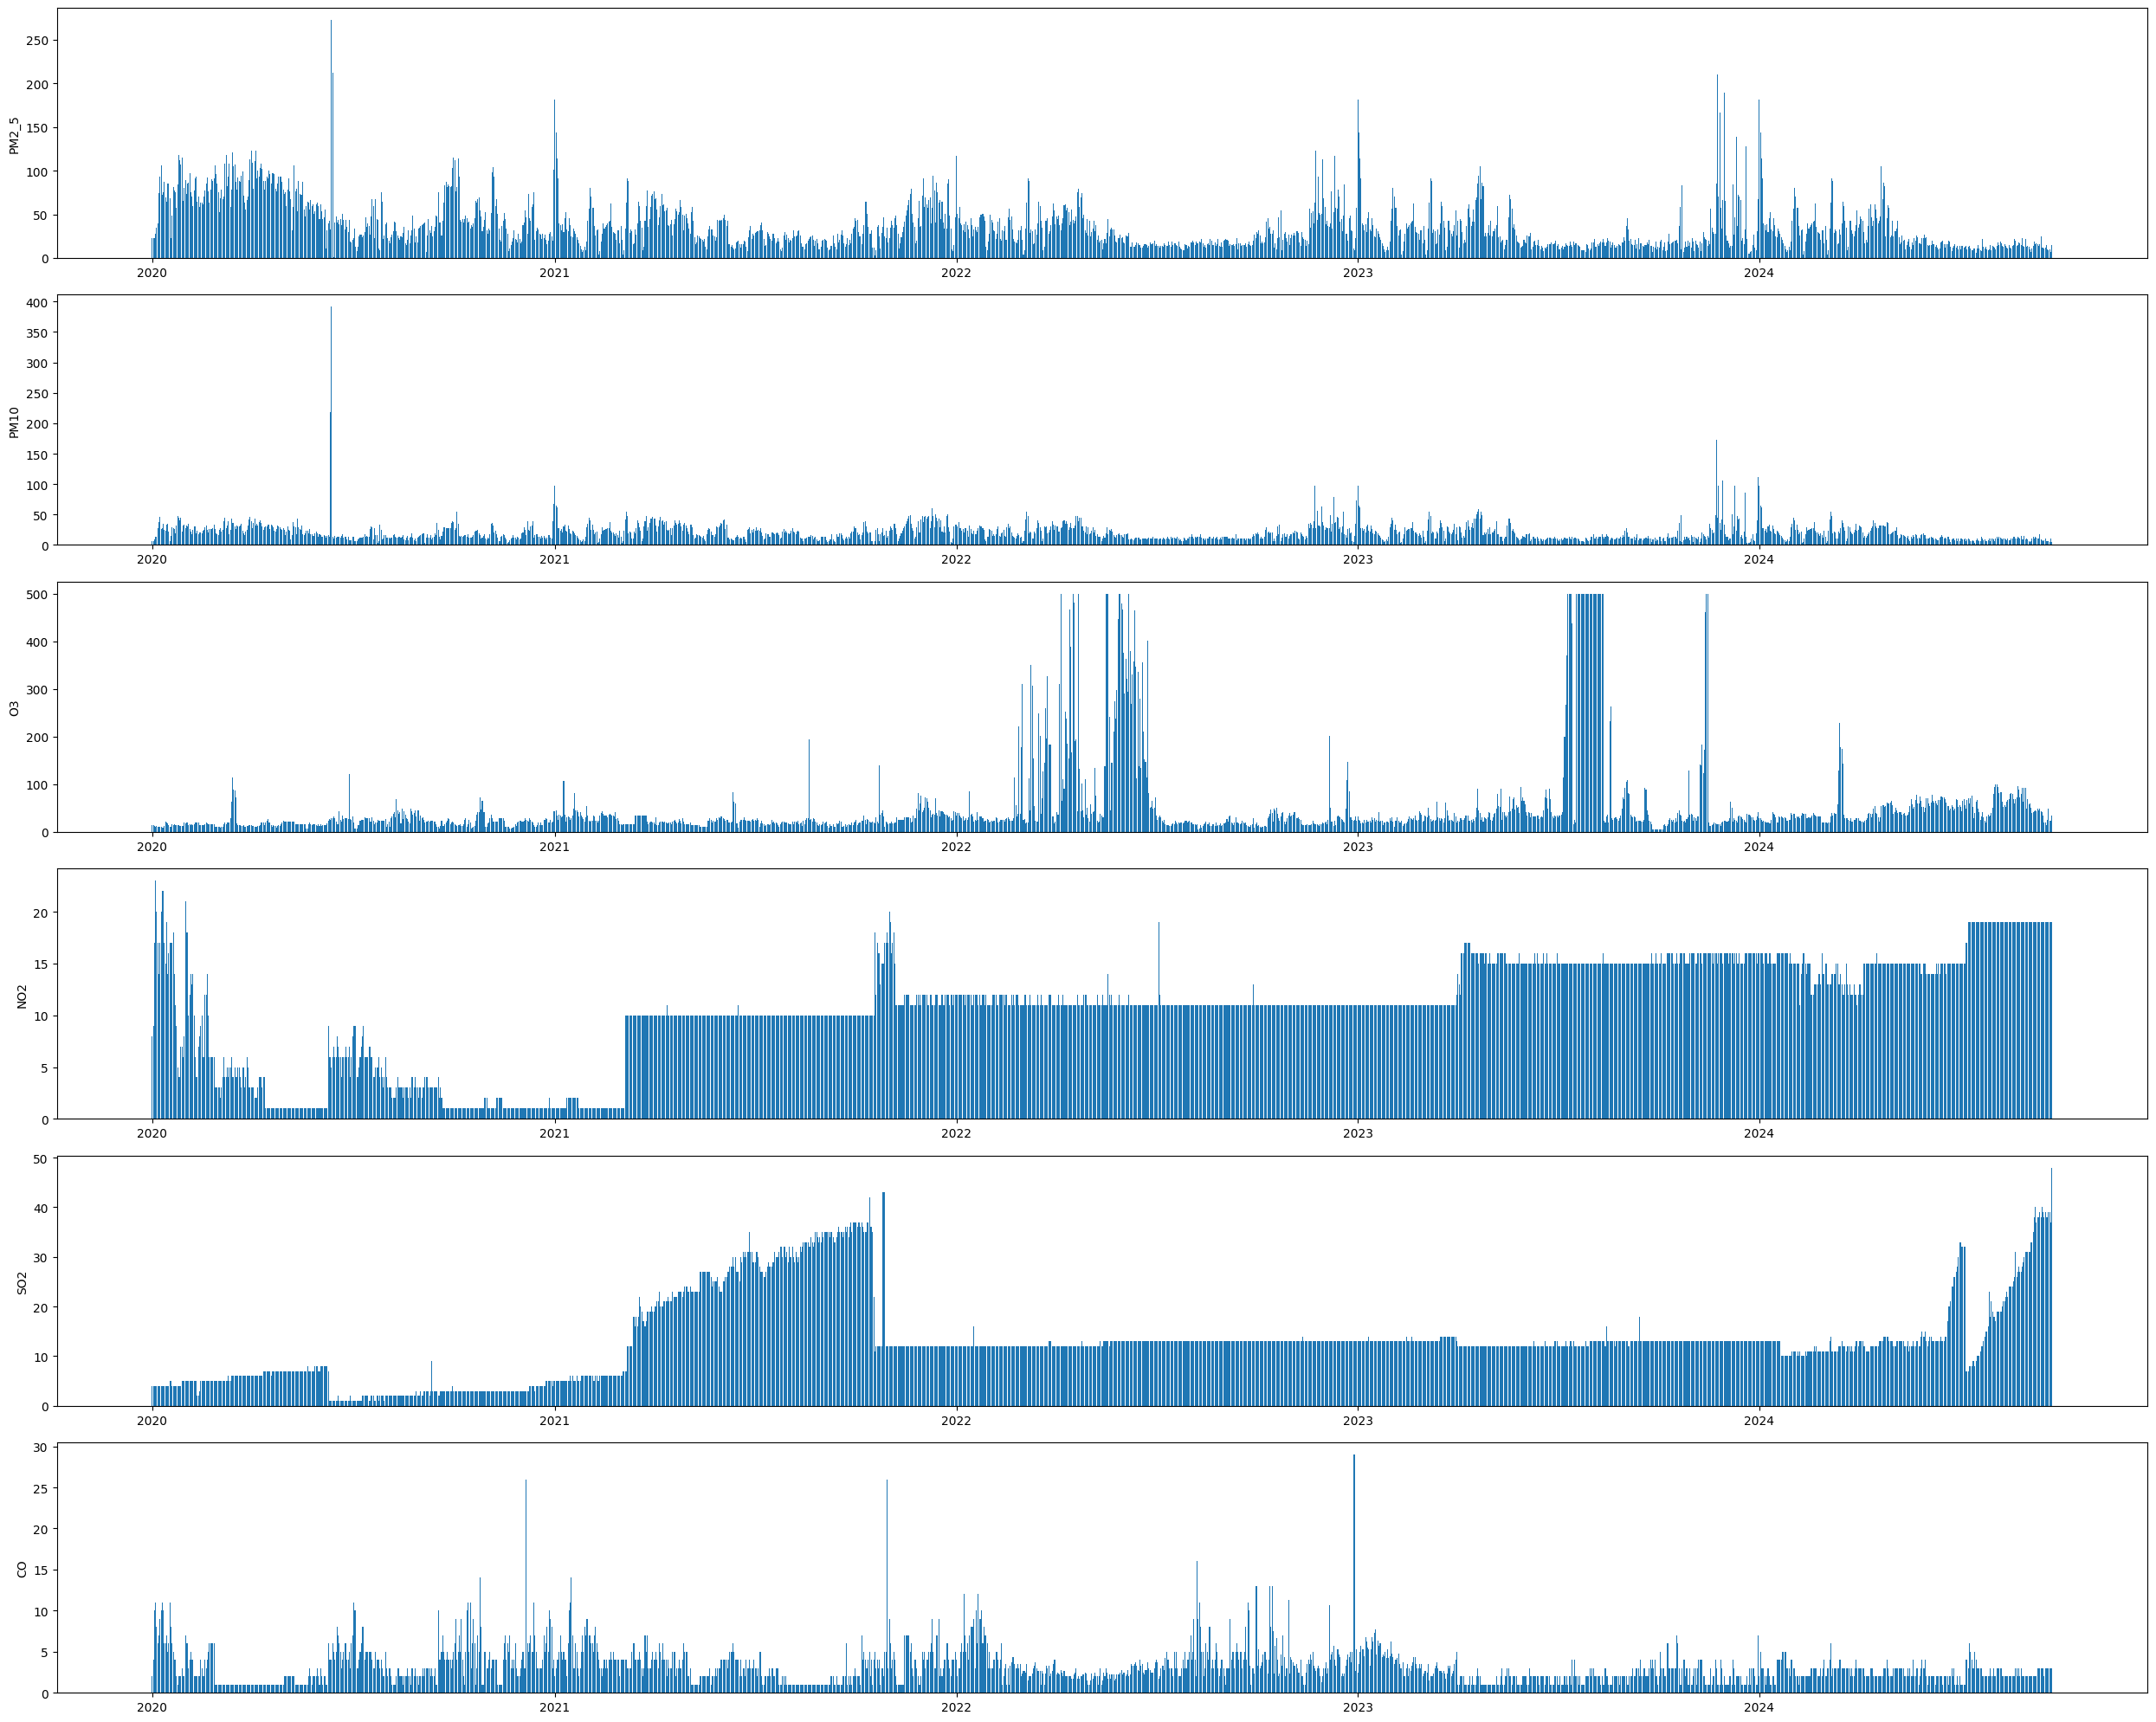

In [23]:
cols = ['pm2_5', 'pm10', 'o3', 'no2', 'so2', 'co']
fig, axs = plt.subplots(nrows=6, ncols=1, figsize=(25, 20))
for i, col in enumerate(cols):
    axs[i].bar(df["date_time"], df[col])
    axs[i].set_ylabel(col.upper())
plt.tight_layout()
plt.show()

In [24]:
df.head()

,date_time,totalprecip_mm,avgvis_km,temp_c,wind_kph,pressure_in,humidity,pm2_5,pm10,o3,no2,so2,co,day,month,year
0,2020-01-01,15.0,6.5,19.0,11.89,30.15,96.0,22.724,6.118,14.0,8.0,4.0,2.0,1,1,2020
1,2020-01-02,1.7,4.9,20.9,6.63,30.13,93.0,22.724,6.992,14.0,9.0,4.0,4.0,2,1,2020
2,2020-01-03,2.1,8.8,21.9,7.33,30.07,91.0,22.724,9.614,13.0,17.0,4.0,10.0,3,1,2020
3,2020-01-04,0.7,9.7,22.2,6.32,30.02,85.0,27.968,13.110,11.0,23.0,4.0,11.0,4,1,2020
4,2020-01-05,0.2,10.0,21.5,6.72,30.00,86.0,34.960,13.110,12.0,20.0,4.0,8.0,5,1,2020


In [25]:
cur.execute("""CREATE TABLE IF NOT EXISTS Weather_Air_Cleaned (
                date_time DATE PRIMARY KEY,
                totalprecip_mm FLOAT NULL,
                avgvis_km FLOAT NULL,
                temp_c FLOAT NULL,
                wind_kph FLOAT NULL,
                pressure_in FLOAT NULL,
                humidity FLOAT NULL,
                pm2_5 FLOAT NULL,
                pm10 FLOAT NULL,
                o3 FLOAT NULL,
                no2 FLOAT NULL,
                so2 FLOAT NULL,
                co FLOAT NULL
                )""")

In [26]:
df.drop(columns=["day", "month", "year"], inplace=True)
query = """INSERT INTO Weather_Air_Cleaned (date_time, totalprecip_mm, avgvis_km, temp_c, wind_kph, pressure_in, humidity, pm2_5, pm10, o3, no2, so2, co) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)"""
data = [tuple(x) for x in df.values]
cur.executemany(query, data)
connection.commit()

In [27]:
cur.close()
connection.close()

In [28]:
df.to_csv("weather_air_cleaned", index=False)